<a href="https://colab.research.google.com/github/andrewwoood/mbit_personality_classifier/blob/main/mbti_classifier_dense_NNwithlime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive'

Mounted at /content/drive
MyDrive  Shareddrives


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import plotly.express as px
import plotly
import seaborn as sns

filePath = "/content/drive/Shareddrives/466 Group Project/mbti_1.csv"

df = pd.read_csv(filePath,header=0)
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


<Figure size 3600x1440 with 0 Axes>

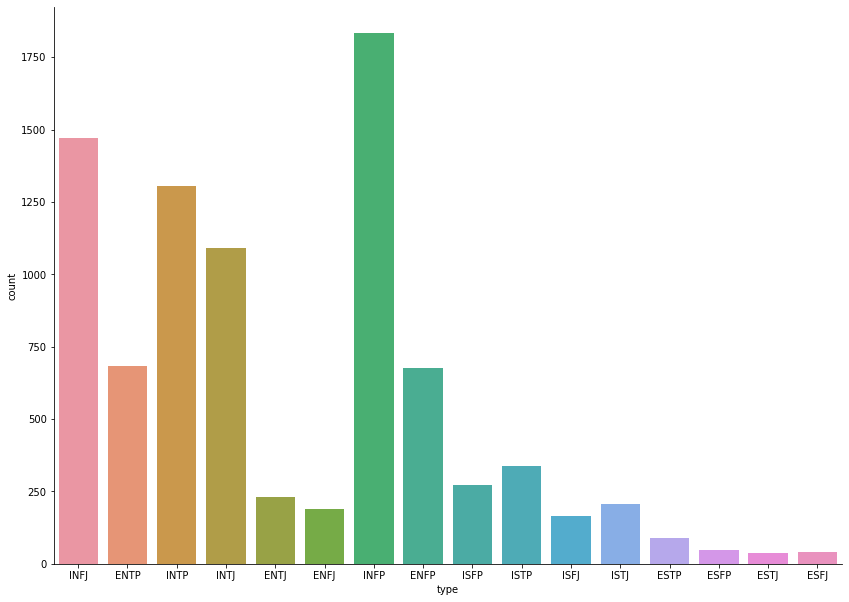

In [ ]:
fig = plt.gcf()
fig.set_size_inches(50, 20)
sns.catplot(x="type", kind="count", data=df,height=8.27, aspect=11.7/8.27)

In [ ]:
#
# Just striping the string incase of any whitespace before or after the string
df["type"] = df["type"].str.strip()
# Seperate the the label into four different parts
target_multi_label = df["type"].str.split("",expand=True)
print(target_multi_label)
target_multi_label = target_multi_label.iloc[: , 1:-1]

target_multi_label.columns = ["Personality-1","Personality-2","Personality-3","Personality-4"]

df = pd.concat([df,target_multi_label] , axis=1)

df.head()

     0   1  2  3  4 5 
0        I  N  F  J   
1        E  N  T  P   
2        I  N  T  P   
3        I  N  T  J   
4        E  N  T  J   
...  .. .. .. .. .. ..
8670     I  S  F  P   
8671     E  N  F  P   
8672     I  N  T  P   
8673     I  N  F  P   
8674     I  N  F  P   

[8675 rows x 6 columns]


,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


<Figure size 3600x1440 with 0 Axes>

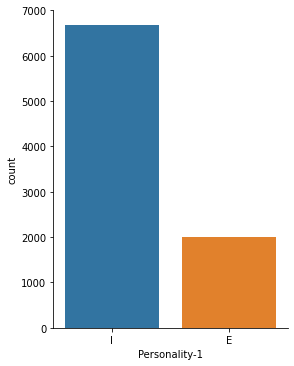

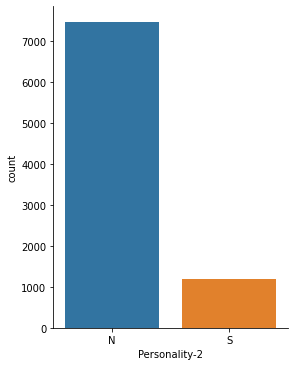

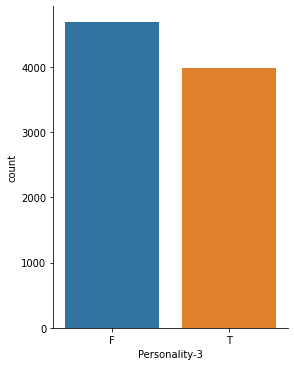

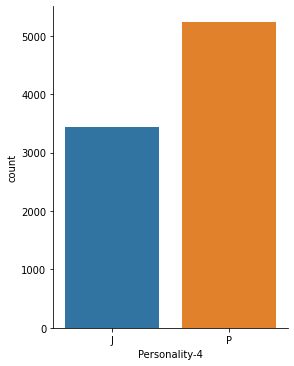

In [ ]:
fig = plt.gcf()
fig.set_size_inches(50, 20)
sns.catplot(x="Personality-1", kind="count", data=df,height=5, aspect=4/5)
sns.catplot(x="Personality-2", kind="count", data=df,height=5, aspect=4/5)
sns.catplot(x="Personality-3", kind="count", data=df,height=5, aspect=4/5)
sns.catplot(x="Personality-4", kind="count", data=df,height=5, aspect=4/5)

In [ ]:
#version1 of text pre-processing

#source:https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79
!pip install Unidecode
!pip install contractions
import nltk
nltk.download('wordnet')

from bs4 import BeautifulSoup
import spacy
import unidecode 
#from word2number import w2n
import contractions
from nltk.stem import WordNetLemmatizer 
import re

def preprocessing_v1(text):
    #remove html information
    soup = BeautifulSoup(text, "html.parser")
    processed = soup.get_text(separator=" ")
    
    #remove http// 
    processed = re.sub(r"http\S+", "", processed)

    #remove ||| seperate
    processed = re.sub(r'\|\|\|', r' ', processed)

    #lower case
    processed = processed.lower()

    #expand shortened words, e.g. don't to do not
    processed = contractions.fix(processed)

    #remove accented char
    processed = unidecode.unidecode(processed)

    #remove white space
    #processed = processed.strip()
    #processed = " ".join(processed.split())

    # Lemmatizing 
    lemmatizer = WordNetLemmatizer() 
    processed=lemmatizer.lemmatize(processed)


    return processed

     |████████████████████████████████| 245kB 7.6MB/s 
     |████████████████████████████████| 327kB 7.3MB/s 
     |████████████████████████████████| 266kB 10.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85401 sha256=81e70650aca62289bc086e5b4603134b471954ce4ae4b9622128efc1e810a4a3
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['posts'] = df['posts'].apply(preprocessing_v1)
posts = df['posts']
df.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,' and intj moments sportscenter not top ten...,I,N,F,J
1,ENTP,'I am finding the lack of me in these posts ve...,E,N,T,P
2,INTP,"'good one _____ course, to which i say i k...",I,N,T,P
3,INTJ,"'dear intp, i enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'you are fired. that is another silly misconce...,E,N,T,J


In [ ]:
posts = df['posts']
for i in range(10):
    print(posts[i])

' and intj moments    sportscenter not top ten plays    pranks what has been the most life-changing experience in your life?      on repeat for most of today. may the perc experience immerse you. the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~    enfj7. sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as... 84389  84390     ... welcome and stuff.   game. set. match. prozac, wellbrutin, at least thirty minutes of moving your legs (and i do not mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... basically come up with three items you have determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... all things in moderation.  sims i

In [ ]:
# Labels for introversion vs extraversion
first_dimension = df['Personality-1']
# The model can't predict a float from a char, so we replace the I with 0 and E with 1
# I couldn't do this in place for some reason so i made a new array. This runtime is pretty shit cuz of append

# Make this np.zeros_lke first dim to fix runtime (?)
first_dim = []

for idx, letter in enumerate(first_dimension):
    if letter is 'I':
        first_dim.append(0)
    else:
        first_dim.append(1)

first_dim = np.array(first_dim)
print(first_dim)

[0 1 0 ... 0 0 0]


In [ ]:
full_type_labels = df['type']
# Enumerating the personality types so that our model can work with numbers
personality_dict = {"ENTJ" : 0, "INTJ" : 1, "ENTP" : 2, "INTP" : 3, "INFJ" : 4, "INFP" : 5, "ENFJ" : 6 , 
                    "ENFP" : 7, "ESTP" : 8, "ESTJ" : 9, "ISTP" : 10, "ISTJ" : 11, "ISFJ" : 12, "ISFP" : 13, 
                    "ESFJ" : 14, "ESFP" : 15}

type_labels = []

# Go through the array and turn the personality type into its corresponding number
for idx, personality in enumerate(full_type_labels):
    type_labels.append(personality_dict[personality])

type_labels = np.array(type_labels)

print(type_labels)
# print(full_type_labels)


[4 2 3 ... 3 5 5]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Only considering the top 10000 most common words
vocab_size = 10000
max_length = 2016
# We have 8675 rows
training_size = 8675//2
training_posts = posts[0:training_size]
testing_posts = posts[training_size:]
# Right now is only predicting introversion or extroversion
training_labels = type_labels[0:training_size]
testing_labels = type_labels[training_size:]

# We only want to fit the tokenizer on the training, not the testing
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_posts)

word_index = tokenizer.word_index

# Puts the padding (which are 0) at the end of the vectorized sentence.
# The longest post in our dataset is 2016, but we should truncate='post' earlier than 2016 words
training_sequences = tokenizer.texts_to_sequences(training_posts)
training_padded = pad_sequences(training_sequences, padding = 'post', maxlen = max_length)
# training_sequences = np.array(training_sequences)
training_padded = np.array(training_padded)

testing_sequences = tokenizer.texts_to_sequences(testing_posts)
testing_padded = pad_sequences(testing_sequences, padding = 'post', maxlen=max_length)
training_padded = np.array(training_padded)


print(word_index)
print(training_padded[0])
print(training_padded.shape)

{'<OOV>': 1, 'i': 2, 'the': 3, 'to': 4, 'a': 5, 'and': 6, 'is': 7, 'you': 8, 'of': 9, 'not': 10, 'it': 11, 'that': 12, 'in': 13, 'my': 14, 'have': 15, 'am': 16, 'do': 17, 'are': 18, 'but': 19, 'for': 20, 'me': 21, 'with': 22, 'this': 23, 'be': 24, 'like': 25, 'on': 26, 'was': 27, 'as': 28, 'an': 29, 'so': 30, 'if': 31, 'just': 32, 'what': 33, 'can': 34, 'or': 35, 'would': 36, 'about': 37, 'think': 38, 'people': 39, 'your': 40, 'when': 41, 'they': 42, 'at': 43, 'all': 44, 'we': 45, 'know': 46, 'one': 47, 'will': 48, 'really': 49, 'more': 50, 'he': 51, 'because': 52, 'how': 53, 'there': 54, 'out': 55, 'from': 56, 'get': 57, 'some': 58, 'time': 59, 'up': 60, 'very': 61, 'them': 62, 'no': 63, 'who': 64, 'feel': 65, 'much': 66, 'being': 67, 'well': 68, 'too': 69, 'been': 70, 'by': 71, 'love': 72, 'she': 73, 'good': 74, 'want': 75, 'other': 76, 'things': 77, 'say': 78, 'way': 79, 'something': 80, 'had': 81, 'did': 82, 'most': 83, 'see': 84, 'only': 85, 'also': 86, 'has': 87, 'then': 88, 'doe

In [ ]:
#Second parameter is the output dimension. Therefore, when we are changing this to predict 4 dimensions of personality we should change it to 4
# ^^ actually i dont know if that is true
embedding_dim = 256
'''
Embedding layer will always have vocab_size*embedding_dim parameters. Since vocab_size is 10,000 the number of parameters on this layer will always be large
'''
model = tf.keras.Sequential([ 
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2016, 256)         2560000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
Total params: 2,602,192
Trainable params: 2,602,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose = 1)

Epoch 1/10
136/136 [==============================] - 22s 155ms/step - loss: 2.5087 - accuracy: 0.1801 - val_loss: 2.2704 - val_accuracy: 0.2125
Epoch 2/10
136/136 [==============================] - 21s 157ms/step - loss: 2.2968 - accuracy: 0.1922 - val_loss: 2.2529 - val_accuracy: 0.2125
Epoch 3/10
136/136 [==============================] - 22s 158ms/step - loss: 2.2676 - accuracy: 0.2044 - val_loss: 2.1898 - val_accuracy: 0.2130
Epoch 4/10
136/136 [==============================] - 21s 152ms/step - loss: 2.1167 - accuracy: 0.2489 - val_loss: 1.9912 - val_accuracy: 0.2962
Epoch 5/10
136/136 [==============================] - 19s 144ms/step - loss: 1.8865 - accuracy: 0.3181 - val_loss: 1.8390 - val_accuracy: 0.3621
Epoch 6/10
136/136 [==============================] - 21s 157ms/step - loss: 1.5950 - accuracy: 0.4031 - val_loss: 1.7617 - val_accuracy: 0.3836
Epoch 7/10
136/136 [==============================] - 20s 149ms/step - loss: 1.3693 - accuracy: 0.4889 - val_loss: 1.7758 - val_ac

In [ ]:
resultList = list([0.15191332411249422, 0.16874135546334718, 0.1731212540341171, 0.13854310742277548, 0.13416320885200553, 0.16459197786998617, 0.16090364223144307, 0.17542646380820653, 0.14015675426463808, 0.15145228215767634, 0.15029967727063162, 0.15398801290917474, 0.13946519133241125, 0.13946519133241125, 0.1809589672660212, 0.16597510373443983, 0.1392346703550023, 0.1710465652374366, 0.15928999538958044, 0.12793914246196403, 0.17680958967266022, 0.1825726141078838, 0.1839557399723375, 0.1454587367450438, 0.16874135546334718, 0.16758875057630243, 0.13992623328722914, 0.19271553711387737, 0.15882895343476255, 0.12793914246196403, 0.1668971876440756, 0.14315352697095435, 0.1553711387736284, 0.15099124020285845, 0.14223144306131857, 0.15836791147994467, 0.18349469801751958, 0.16505301982480405, 0.1938681420009221, 0.14476717381281698, 0.16067312125403413, 0.15491009681881052, 0.19778699861687413, 0.15352697095435686, 0.1574458275703089, 0.15560165975103735, 0.12240663900414937, 0.1267865375749193, 0.15260488704472108, 0.16182572614107885, 0.18695251267865376, 0.10465652374366068, 0.17634854771784234, 0.13600737667127707, 0.16597510373443983, 0.19248501613646843, 0.13370216689718764, 0.13462425080682341, 0.13439372982941447, 0.1710465652374366, 0.1954817888427847, 0.16643614568925771, 0.17911479944674966, 0.15652374366067312, 0.1417704011065007, 0.15099124020285845, 0.18418626094974644, 0.14153988012909174, 0.16781927155371137, 0.1648224988473951, 0.18810511756569848, 0.17842323651452283, 0.13854310742277548, 0.16021207929921624, 0.16620562471184877, 0.15053019824804056, 0.17219917012448133, 0.17404333794375287, 0.16620562471184877, 0.1507607192254495, 0.16597510373443983, 0.16343937298294145, 0.1950207468879668, 0.2049331489165514, 0.16390041493775934, 0.1380820654679576, 0.18856615952051636, 0.16228676809589673, 0.15099124020285845, 0.18695251267865376, 0.1491470723835869, 0.15306592899953897, 0.17196864914707238, 0.1313969571230982, 0.1731212540341171, 0.1788842784693407, 0.14476717381281698, 0.16574458275703088, 0.1731212540341171, 0.15467957584140157, 0.1917934532042416, 0.15836791147994467, 0.18626094974642693, 0.19571230982019364, 0.13162747810050715, 0.16966343937298295, 0.12793914246196403, 0.17704011065006917, 0.1558321807284463, 0.15836791147994467, 0.18326417704011064, 0.18810511756569848, 0.1542185338865837, 0.15652374366067312, 0.14845550945136007, 0.15145228215767634, 0.16136468418626096, 0.15975103734439833, 0.19432918395573998, 0.1871830336560627, 0.15260488704472108, 0.1887966804979253, 0.11848778238819732, 0.165283540802213, 0.1479944674965422, 0.165283540802213, 0.12770862148455508, 0.15975103734439833, 0.13416320885200553, 0.1772706316274781, 0.17957584140156754, 0.14845550945136007, 0.14730290456431536, 0.17911479944674966, 0.1475334255417243, 0.18787459658828953, 0.17081604426002767, 0.17796219455970494, 0.15675426463808206, 0.13854310742277548, 0.2028584601198709, 0.1632088520055325, 0.1731212540341171, 0.17957584140156754, 0.17680958967266022, 0.17657906869525128, 0.17081604426002767, 0.16597510373443983, 0.16067312125403413, 0.19225449515905949, 0.17081604426002767, 0.17127708621484555, 0.18003688335638543, 0.18211157215306592, 0.1825726141078838, 0.15352697095435686, 0.15214384508990317, 0.14384508990318118, 0.1615952051636699, 0.17704011065006917, 0.15029967727063162, 0.17819271553711388, 0.14200092208390963, 0.1590594744121715, 0.18234209313047486, 0.16090364223144307, 0.18971876440756108, 0.16804979253112035, 0.1454587367450438, 0.18533886583679116, 0.16136468418626096, 0.16343937298294145, 0.16297833102812356, 0.1648224988473951, 0.15491009681881052, 0.1673582295988935, 0.15237436606731214, 0.17842323651452283, 0.1590594744121715, 0.1887966804979253, 0.17289073305670816, 0.16090364223144307, 0.169432918395574, 0.16251728907330568, 0.1731212540341171, 0.13001383125864455, 0.16597510373443983, 0.13600737667127707, 0.14568925772245275, 0.1966343937298294, 0.16390041493775934, 0.1673582295988935, 0.15237436606731214, 0.15836791147994467, 0.18049792531120332, 0.14730290456431536, 0.16274781005071462, 0.14476717381281698, 0.17496542185338865, 0.18072844628861226])
normalAccuracy = 0.5021

[0.15191332411249422, 0.16874135546334718, 0.1731212540341171, 0.13854310742277548, 0.13416320885200553, 0.16459197786998617, 0.16090364223144307, 0.17542646380820653, 0.14015675426463808, 0.15145228215767634, 0.15029967727063162, 0.15398801290917474, 0.13946519133241125, 0.13946519133241125, 0.1809589672660212, 0.16597510373443983, 0.1392346703550023, 0.1710465652374366, 0.15928999538958044, 0.12793914246196403, 0.17680958967266022, 0.1825726141078838, 0.1839557399723375, 0.1454587367450438, 0.16874135546334718, 0.16758875057630243, 0.13992623328722914, 0.19271553711387737, 0.15882895343476255, 0.12793914246196403, 0.1668971876440756, 0.14315352697095435, 0.1553711387736284, 0.15099124020285845, 0.14223144306131857, 0.15836791147994467, 0.18349469801751958, 0.16505301982480405, 0.1938681420009221, 0.14476717381281698, 0.16067312125403413, 0.15491009681881052, 0.19778699861687413, 0.15352697095435686, 0.1574458275703089, 0.15560165975103735, 0.12240663900414937, 0.1267865375749193, 0.1

Text(0.5, 1.0, 'Personality Classification')

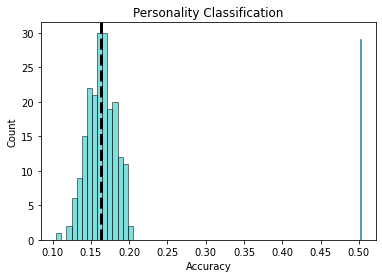

In [ ]:
print(resultList)
print(normalAccuracy)
plt.hist(resultList, bins=15, color='c', edgecolor='k', alpha=0.5)
plt.axvline(np.array(resultList).mean(), color='k', linestyle='dashed', linewidth=3)
plt.xlabel('Accuracy')
plt.ylabel('Count')

#draw the accuracy from the normal data
y = np.arange(0, 30, 1)
xNum = [normalAccuracy]
x = np.array(xNum * 30)
plt.plot(x, y)
plt.title('Personality Classification')

In [ ]:
!pip install lime
from lime import lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [ ]:
index_of_testing = 2373

explainer = LimeTextExplainer(class_names=["ENTJ", "INTJ", "ENTP", "INTP" , "INFJ", "INFP", "ENFJ" , 
                    "ENFP", "ESTP", "ESTJ", "ISTP", "ISTJ", "ISFJ" , "ISFP" , 
                    "ESFJ", "ESFP"])
def rnn_predict_fn(text):
  seq = tokenizer.texts_to_sequences(text)

  seq = pad_sequences(seq,padding="post",maxlen=max_length)

  result = model.predict(seq)

  return result
print("the true label",df["type"][training_size+index_of_testing])
exp = explainer.explain_instance(posts[training_size+index_of_testing],rnn_predict_fn,num_features=30,top_labels=4)
exp.show_in_notebook(text=True)

the true label ESFJ
